# Understanding Pandas Series and DataFrames - Lab

# Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Practice

## Objectives
You will be able to:
* Understand and explain what Pandas Series and DataFrames are and how they differ from dictionaries and lists
* Create Series & DataFrames from dictionaries and lists
* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

# Rename all the columns to lower case

In [16]:
for name in list(df.columns):
    df = df.rename(columns={name: name.lower()})

In [17]:
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Change the Index to be the Line Names

In [18]:
df = df.set_index('linename')

# Painstakingly change the index back

In [19]:
df = df.reset_index()

In [20]:
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order.

In [21]:
df['Num_Lines'] = df.linename.map(lambda x: len(x))   

In [27]:
df = df.sort_values('Num_Lines', ascending=False)

In [30]:
df = df.reset_index().drop(columns='index', axis=1)

In [31]:
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
0,1237ACENQRSW,R145,R032,00-00-02,TIMES SQ-42 ST,IRT,08/29/2018,04:00:00,REGULAR,5446001,2443889,12
1,1237ACENQRSW,R151,R033,00-00-05,TIMES SQ-42 ST,IRT,08/31/2018,00:00:00,REGULAR,36398027,88388600,12
2,1237ACENQRSW,R151,R033,00-00-05,TIMES SQ-42 ST,IRT,08/28/2018,11:29:43,REGULAR,36392251,88378983,12
3,1237ACENQRSW,R151,R033,00-00-05,TIMES SQ-42 ST,IRT,08/28/2018,10:00:23,REGULAR,36392128,88378773,12
4,1237ACENQRSW,R151,R033,00-00-05,TIMES SQ-42 ST,IRT,08/28/2018,08:00:00,REGULAR,36391956,88378253,12


## Write a function to clean a column name.

In [32]:
def clean(col_name):
    cleaned = col_name.title()
    return cleaned

In [33]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [34]:
#Checking the output, we can see the results.
df.columns

Index(['Linename', 'C/A', 'Unit', 'Scp', 'Station', 'Division', 'Date', 'Time',
       'Desc', 'Entries',
       'Exits                                                               ',
       'Num_Lines'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

In [36]:
df.Date = pd.to_datetime(df.Date)

In [49]:
df2 = df2.rename(columns={'Exits                                                               ':'Exits'})

In [39]:
df['DayofWeek'] = df.Date.dt.day_name()

In [44]:
df2 = df.groupby("DayofWeek").sum()

In [47]:
df2 = df2.drop(columns='Num_Lines', axis=1)

In [67]:
df2 = df2.reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

<BarContainer object of 7 artists>

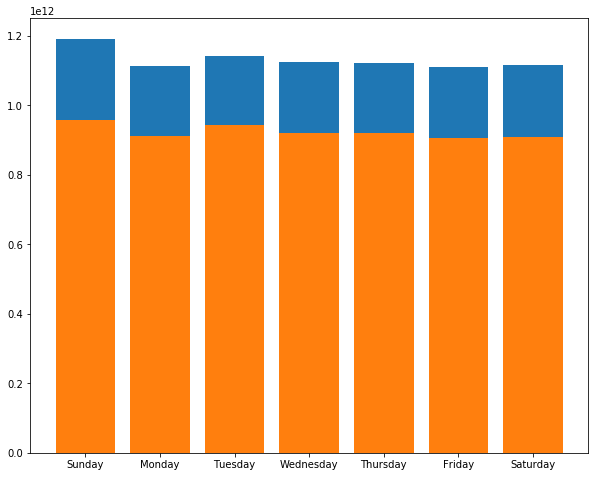

In [73]:
plt.figure(figsize=(10,8))
plt.bar(x = list(df2.index), height = df2.Entries)
plt.bar(x = list(df2.index), height = df2.Exits)

In [53]:
df2.index

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object', name='DayofWeek')

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes.

In [ ]:
#Your code here

# Drop a couple of columns

In [ ]:
# Your code here